# 파이썬 데이터 분석

-----

# 전세계 음주 데이터 분석하기

# <Step1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sem.chat80 import continent

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

In [2]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

# <Step2. 인사이트의 발견> : 탐색과 시각화

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [4]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.

drinks[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


-----

##### [여러 피처의 상관관계 분석]

In [5]:
# 피처간의 상관계수 행렬을 구합니다.

corr = drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


-----

-----

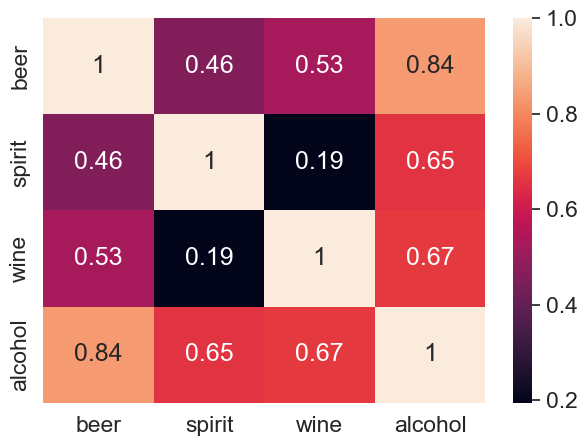

In [6]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set_theme(font_scale=1.5)

hm = sns.heatmap(corr.values, annot=True, yticklabels=cols_view, xticklabels=cols_view)

plt.tight_layout()
plt.show()



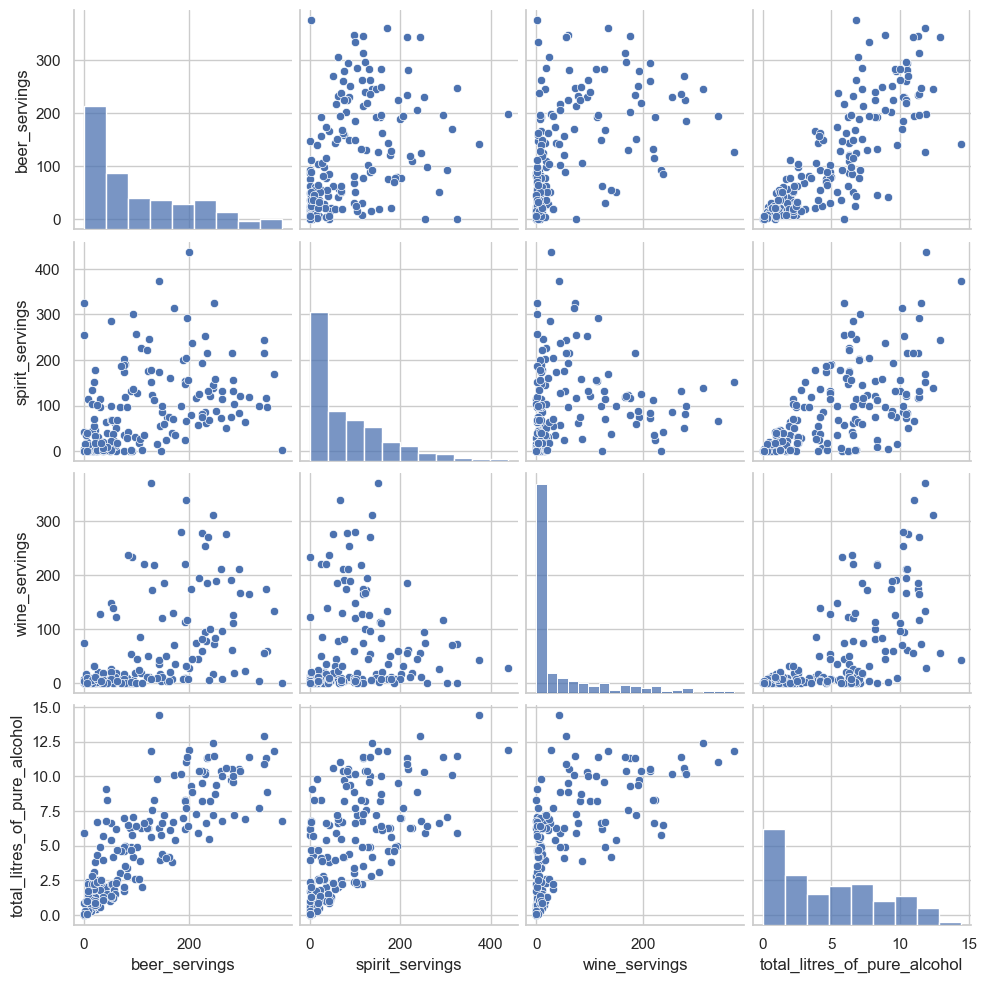

In [7]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set_theme(style='whitegrid', context='notebook')

sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']])

plt.show()

-----

# <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

In [8]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [9]:
drinks.continent.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [10]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

In [11]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


-----

##### 파이차트 시각화

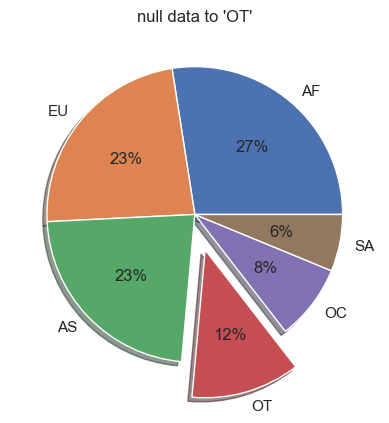

In [12]:
labels = drinks['continent'].value_counts().index #.tolist()
fracs1 = drinks['continent'].value_counts().values #.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

-----

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [13]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.

result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [14]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_alcohol_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean > total_alcohol_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [15]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
continent_mean = drinks.groupby('continent')['beer_servings'].mean().idxmax()
print(continent_mean)

EU
